### Get familiar with precipitation data

- Load **complete** data.
- Get the area averaged total precipitation in the Sahel zone for each sample.
- Compute the mean and std. dev. over the whole time span separately for each month.

### Tech preamble

In [35]:
import os
import xarray as xr
import numpy as np

from matplotlib import pyplot as plt

### Load data

#### CESM and FOCI

In [2]:
## Prepare CESM and FOCI samples:

# Set path CESM and FOCI full data:
path_to_CESM_full_data = '../../climate_index_collection/data/raw/2022-08-22/CESM/B1850WCN_f19g16_1000y_v3.2_mod-S15-G16.cam2.h0.0001-0999.PRECT.nc'
path_to_FOCI_full_data = '../../climate_index_collection/data/raw/2022-08-22/FOCI/FOCI1.3-SW038_echam6_BOT_mm_2350-3349_precip_monthly_1_midmonth.nc'

# Load CESM and FOCI full data:
data_CESM = xr.open_dataset(path_to_CESM_full_data)
data_FOCI = xr.open_dataset(path_to_FOCI_full_data)

# Get precipitation for CESM and FOCI test data:
prec_CESM = data_CESM['PRECT']
prec_FOCI = data_FOCI['precip']


/opt/miniconda3/lib/python3.9/site-packages/xarray/coding/times.py:526: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/opt/miniconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


In [3]:
prec_CESM

<xarray.DataArray 'PRECT' (time: 11988, lat: 96, lon: 144)>
[165722112 values with dtype=float32]
Coordinates:
  * time     (time) object 2350-01-15 00:00:00 ... 3348-12-15 00:00:00
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
Attributes:
    long_name:     Total (convective and large-scale) precipitation rate (liq...
    units:         mm/day
    cell_methods:  time: mean

In [56]:
prec_FOCI

<xarray.DataArray 'precip' (time: 12000, lat: 96, lon: 192)>
[221184000 values with dtype=float32]
Coordinates:
  * time     (time) object 2350-01-15 00:00:00 ... 3349-12-15 00:00:00
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * lat      (lat) float64 88.57 86.72 84.86 83.0 ... -83.0 -84.86 -86.72 -88.57
Attributes:
    long_name:         total precipitation
    units:             mm/day
    code:              4
    table:             128
    CDI_grid_type:     gaussian
    CDI_grid_num_LPE:  48

In [58]:
## The Sahel zone is assumed to be bordered by 10 to 20°N and 20°W to 10°E. Define mask:

# CESM:
mask_sahel_CESM = (
    (prec_CESM.coords['lat'] >= 10) &
    (prec_CESM.coords['lat'] <= 20) &
    ((prec_CESM.coords['lon'] >= 340) | (prec_CESM.coords['lon'] <= 10))
)

# FOCI:
mask_sahel_FOCI = (
    (prec_FOCI.coords['lat'] >= 10) &
    (prec_FOCI.coords['lat'] <= 20) &
    ((prec_FOCI.coords['lon'] >= 340) | (prec_FOCI.coords['lon'] <= 10))
)

In [60]:
# Compute monthly mean and std. dev. over time.
# Note: Since the Sahel zone is close to the equator, we neglect area weighting, here.
prec_CESM_mean = prec_CESM.where(mask_sahel_CESM).mean(('lat', 'lon')).groupby('time.month').mean('time')
prec_CESM_std = prec_CESM.where(mask_sahel_CESM).std(('lat', 'lon')).groupby('time.month').mean('time')
prec_FOCI_mean = prec_FOCI.where(mask_sahel_FOCI).mean(('lat', 'lon')).groupby('time.month').mean('time')
prec_FOCI_std = prec_FOCI.where(mask_sahel_FOCI).std(('lat', 'lon')).groupby('time.month').mean('time')

In [67]:
# Set label for x-axis:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

Text(0, 0.5, 'avg. precip. [mm/day]')

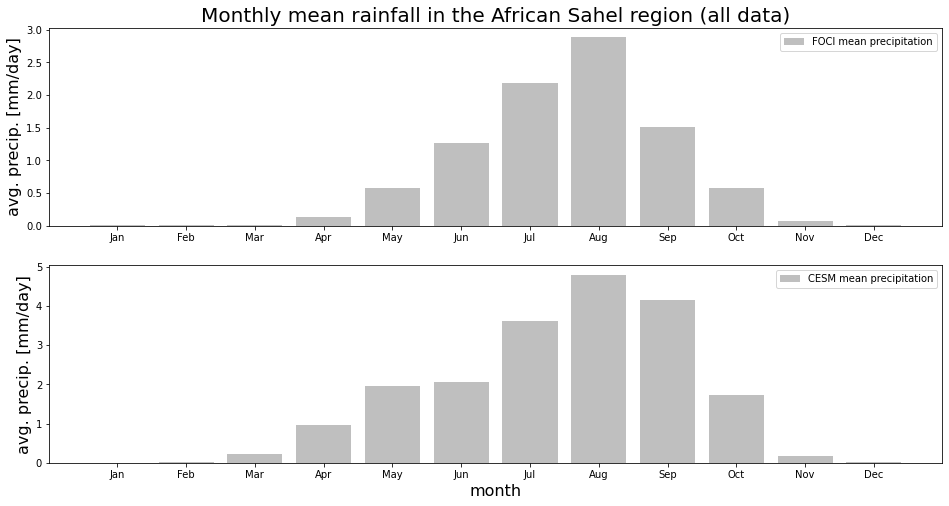

In [91]:
# Plot monthly mean precipitation in the African Sahel zone as bar plot.
# Add +/- one std. dev. as lines.
fig, axes = plt.subplots(2,1,figsize=[16,8])

# FOCI
axes[0].bar(
    x=months,
    height=prec_FOCI_mean.values,
    color='grey',
    label="FOCI mean precipitation",
    alpha=0.5
)
axes[0].legend()
axes[0].set_title('Monthly mean rainfall in the African Sahel region (all data)', fontsize=20)
axes[0].set_ylabel('avg. precip. [mm/day]', fontsize=16)

# CESM
axes[1].bar(
    x=months,
    height=prec_CESM_mean.values,
    color='grey',
    label="CESM mean precipitation",
    alpha=0.5
)
axes[1].legend()
axes[1].set_xlabel('month', fontsize=16)
axes[1].set_ylabel('avg. precip. [mm/day]', fontsize=16)

### Discussion on Sahel precipitation

By far the most rainfall is observed from July through September, referred to as African **Summer Monsoon**.